Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = "NA"

---

# MTH793P - Coursework 4 - Part II

This is a template notebook for the computational exercises of Coursework 4, part 2/3, of the module MTH793P, Advanced Machine Learning. Closely follow the instructions in this template in order to complete the assessment and to obtain full marks. For the submitted notebook, please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions.

If a variable name is specified **<font color='red'>in red</font>**, you must use the same variable name in your code, for it to be graded properly.


In this exercise we will explore the three clustering methods we've seen in class (K-means, GMM, Spectral).<br>
We will use the [MNIST digit dataset](http://yann.lecun.com/exdb/mnist/) to see how these different clustering methods perform on real data.<br> You should use the following classes:
- [**sklearn.cluster.KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (do **not** use your implementation from part I),
- [**sklearn.mixture.GaussianMixture**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- [**sklearn.cluster.SpectralClustering**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
<br>

Read the documentation / examples, to learn how to use them. <br>
You can try to test the various paramaters, but for your final submission always use the **default** values, unless you're instructed otherwise (and except for the number of clusters, which should match our clustering task).

In [2]:
###
### Required imports
###

import numpy as np
import matplotlib.pyplot as plt

from load_mnist import load_mnist
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.manifold import SpectralEmbedding
from numpy.testing import assert_array_equal

%matplotlib inline

In [3]:
### DO NOT REMOVE THIS CELL ### 

In [4]:
###
### Load the MNIST dataset
###

mnist_im, mnist_lb = load_mnist('DigitMNIST/')

The MNIST dataset is a collection of grayscale images of handwritten digits (0,1,...,9).<br>
Here, we will only want to look at the images representing the digits **4,6,8**.<br>
Extract from the loaded dataset only the images corresponding to these digits.<br>
Place this subsets of the images and labels in **<font color='red'>mnist_im_sub</font>** and **<font color='red'>mnist_lb_sub</font>**, respectively.<br>
Note that the images size is 28x28, but they are stored as vectors of length 784.

In [5]:
###
### Extract only a subset of the digits.
###

DIGITS = [4,6,8]

digit_indices = [i for i,x in enumerate(mnist_lb) if x in DIGITS]
mnist_im_sub = np.array([mnist_im[i] for i in digit_indices])
mnist_lb_sub = np.array([mnist_lb[i] for i in digit_indices])
# OR mnist_lb_sub = list(filter(lambda x: x in DIGITS, mnist_lb))

#raise NotImplementedError()

Drawing a sample of the images. Make sure that you only see the digits **4,6,8** here.

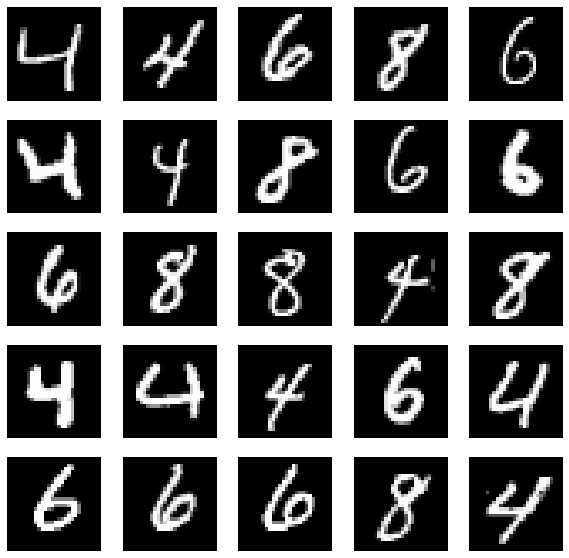

In [6]:
###
### Plot a sample of the images from the database.
###

M = 5
plt.figure(figsize=(10,10))
for i in range(M):
    for j in range(M):
        t = j+i*M
        plt.subplot(M,M,t+1)
        plt.imshow(np.reshape(mnist_im_sub[t, :], (28, 28)), cmap='gray')
        plt.axis('off')

In order for the clustering to run faster, chop the variable **mnist_im_sub** to contain only the first 1000 images (so it's a 1000x784 dimensional array). <br> Do the same for **mnist_im_lb**.
Store the results back in the same variables (**<font color='red'>mnist_im_sub</font>**, **<font color='red'>mnist_lb_sub</font>**).

In [7]:
mnist_im_sub = mnist_im_sub[:1000]
mnist_lb_sub = mnist_lb_sub[:1000]

#raise NotImplementedError()

###
### Making sure arrays are of the right size.
###
assert_array_equal(mnist_im_sub.shape, (1000,784))
assert_array_equal(mnist_lb_sub.shape, 1000)

Use **KMeans** (imported from sklearn.cluster) to run the K-means clustering algorithm on the images.<br>
Store the resulting labels in **<font color='red'>km_labels</font>** and the cluster centers in **<font color='red'>km_centers</font>**.

In [8]:
### DO NOT REMOVE THIS CELL ### 

In [31]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mnist_im_sub)

km_centers = kmeans.cluster_centers_
km_labels = kmeans.labels_

#raise NotImplementedError()

In [32]:
### DO NOT REMOVE THIS CELL ### 

Next, use **GaussianMixture** (imported from sklearn.mixture) to run the GMM clustering algorithm.<br>
Store the resulting labels in **<font color='red'>gm_labels</font>** and the cluster centers in **<font color='red'>gm_centers</font>**.

In [33]:
### DO NOT REMOVE THIS CELL ### 

In [37]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(mnist_im_sub)

gm_centers = gmm.means_
gm_labels = gmm.predict(mnist_im_sub)

#raise NotImplementedError()

In [13]:
### DO NOT REMOVE THIS CELL ### 

Finally, use **SpectralClustering** (imported from sklearn.cluster) to run the spectral clustering algorithm.<br>
For this algorithm, make sure to set **<font color='blue'>affinity='nearest_neighbors</red>'** when you create the clustering object.<br>
Store the resulting labels in **<font color='red'>sp_labels</font>** (spectral clustering doesn't provide centers, why?)

In [14]:
### DO NOT REMOVE THIS CELL ### 

In [15]:
sp = SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors')
sp.fit(mnist_im_sub)

sp_labels = sp.labels_

#raise NotImplementedError()

In [16]:
### DO NOT REMOVE THIS CELL ### 

As a sanity check, we will examine the results on the first 10 images in the dataset.<br>
The code below draws these images.<br>
Print out the first 10 labels that you recieved for each of the three algorithms.

The first 10 k-means labels are [0 0 1 2 1 0 0 2 1 1] 
The first 10 gaussian mixture labels are [1 1 2 0 2 1 1 0 2 2] 
The first 10 spectral clustering labels are [0 0 1 2 1 0 0 2 1 1] 


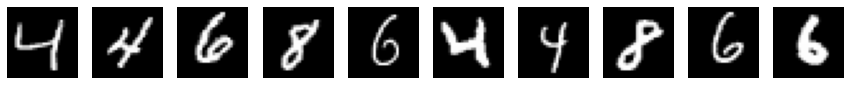

In [17]:
M = 10
plt.figure(figsize=(15,5))
for i in range(M):
    plt.subplot(1,M,i+1)
    plt.imshow(np.reshape(mnist_im_sub[i, :], (28, 28)), cmap='gray')
    plt.axis('off')
    
print("The first 10 k-means labels are {k1} ".format(k1 = km_labels[:10]))
print("The first 10 gaussian mixture labels are {k2} ".format(k2 = gm_labels[:10]))
print("The first 10 spectral clustering labels are {k3} ".format(k3 = sp_labels[:10]))
#raise NotImplementedError()

For each of the algorithms, state below whether or not you got **perfect** cluster labels (for the first 10 digits).<br>
Store the results in the following variables:
-  **<font color='red'>km_perfect</font>** = True/False
-  **<font color='red'>gm_perfect</font>** = True/False
-  **<font color='red'>sp_perfect</font>** = True/False

In [18]:
# check if indices of identical label digits all match as cluster labels differently 0,1 or 2
# np.all() returns False if all elements 0 so check all values of array all same as first value and labels not the same
indices_no4 = np.where(mnist_lb_sub[:10] == 4)
indices_no6 = np.where(mnist_lb_sub[:10] == 6)
indices_no8 = np.where(mnist_lb_sub[:10] == 8)

if np.all(km_labels[:10][indices_no4] == km_labels[:10][indices_no4][0]) and np.all(km_labels[:10][indices_no6] == km_labels[:10][indices_no6][0]) and np.all(km_labels[:10][indices_no8] == km_labels[:10][indices_no8][0]) and km_labels[:10][indices_no4][0] != km_labels[:10][indices_no6][0] != km_labels[:10][indices_no8][0]:
    km_perfect = True
else:
    km_perfect = False

if np.all(gm_labels[:10][indices_no4] == gm_labels[:10][indices_no4][0]) and np.all(gm_labels[:10][indices_no6] == gm_labels[:10][indices_no6][0]) and np.all(gm_labels[:10][indices_no8] == gm_labels[:10][indices_no8][0]) and gm_labels[:10][indices_no4][0] != gm_labels[:10][indices_no6][0] != gm_labels[:10][indices_no8][0]:
    gm_perfect = True
else:
    gm_perfect = False
    
if np.all(sp_labels[:10][indices_no4] == sp_labels[:10][indices_no4][0]) and np.all(sp_labels[:10][indices_no6] == sp_labels[:10][indices_no6][0]) and np.all(sp_labels[:10][indices_no8] == sp_labels[:10][indices_no8][0]) and sp_labels[:10][indices_no4][0] != sp_labels[:10][indices_no6][0] != sp_labels[:10][indices_no8][0]:
    sp_perfect = True
else:
    sp_perfect = False

print("km_perfect = {p1}".format(p1 = km_perfect))
print("gm_perfect = {p2}".format(p2 = gm_perfect))
print("sp_perfect = {p3}".format(p3 = sp_perfect))

#raise NotImplementedError()

km_perfect = True
gm_perfect = True
sp_perfect = True


In [19]:
### DO NOT REMOVE THIS CELL ### 

As a second check, we display the centers of the clusters (relevant for **K-means** and **GMM** only).<br>
The code below will show the images, but you have to fill in the variables **<font color='red'>im_show_km</font>** and **<font color='red'>im_show_gm</font>** with the corresponding center at each step of the loop. Remember that you have to switch from vector to matrices before drawing an image.

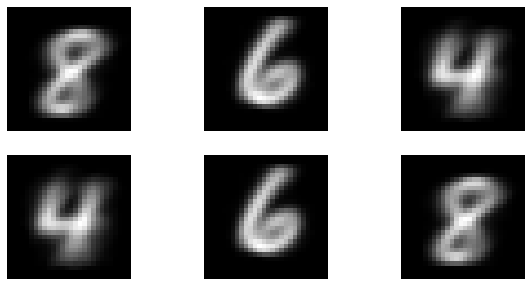

In [43]:
plt.figure(figsize=(10, 5))

for counter in range(K):
    ##########
    # YOUR CODE HERE
    im_show_km = np.reshape(km_centers[counter], (28,28))
    im_show_gm = np.reshape(gm_centers[counter], (28,28))
    #raise NotImplementedError()
    ##########
    plt.subplot(2, K, counter+1)
    plt.imshow(im_show_km,cmap='gray')
    plt.axis('off')
    plt.subplot(2, K, counter+K+1)
    plt.imshow(im_show_gm,cmap='gray')
    plt.axis('off')
plt.tight_layout;  

In [44]:
### DO NOT REMOVE THIS CELL ### 

For spectral clustering, we want to examine the embedding that the algorithm produces.<br>
For that we can use [**sklearn.manifold.SpectralEmbedding**](http://).<br>
Read the documentation / examples, and apply the embedding $P:\mathbb{R}^{784}\to \mathbb{R}^2$
to transform the array of high dimensional vectors in **mnist_im_sub** ($1000\times 784$) into a new array **<font color='red'>mnist_im_emb</font>** that is of dimension $1000\times 2$.<br>
Make sure to set the number of components correctly.

In [60]:
# Dimension reduction useful to visualise different images in simple graph
embedding = SpectralEmbedding(n_components = 2)
mnist_im_emb = embedding.fit_transform(mnist_im_sub[:1000])

#raise NotImplementedError()

We now plot the resulting 2D embedding. What can you deduce from the output?

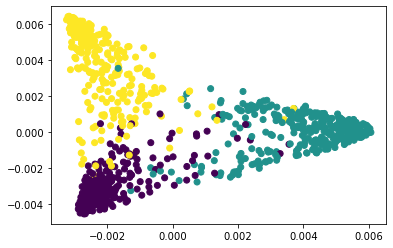

In [75]:
###
### Plot 2D embedding of the images.
###

plt.scatter(mnist_im_emb[:,0], mnist_im_emb[:,1], c=mnist_lb_sub);

Finally, we would like to get a qunatitave estimate for the clustering quality of each of the methods.<br>
Since in this example we know what the ground truth is (the labels given by the MNIST database), we can use an exteral evaluation.<br>
Use **rand_score** (imported from sklearn.metrics) to compute the Rand Score for each of the three algorithms.<br>
Store the results in **<font color='red'>km_RI</font>**, **<font color='red'>gm_RI</font>**, and **<font color='red'>sp_RI</font>** (for K-means, GMM, and Spectral clustering, respectively).

In [76]:
# Rand corrects for labels being the digits 4,6,8 and the 3 clusters being labelled 0,1,2 with varying labels for each digit cluster

km_RI = rand_score(km_labels, mnist_lb_sub)
gm_RI = rand_score(gm_labels, mnist_lb_sub)
sp_RI = rand_score(sp_labels, mnist_lb_sub)
#raise NotImplementedError()

print("Rand Index for K-Means clustering: %.10f" % km_RI)
print("Rand Index for Gassian Mixture clustering: %.10f" % gm_RI)
print("Rand Index for Spectral clustering: %.10f" % sp_RI)

Rand Index for K-Means clustering: 0.8791551552
Rand Index for Gassian Mixture clustering: 0.8804164164
Rand Index for Spectral clustering: 0.9549449449


In [77]:
### DO NOT REMOVE THIS CELL ### 

In [57]:
### DO NOT REMOVE THIS CELL ### 